# STAT0032 GROUP PROJECT

## Objective
- study the distribution of cycle hire counts to gain a better understanding of how various external factors might impact the popularity of cycling in London.
- The outcome should be a report describing the analysis performed, including any statistical tools used as well as (non-technical) recommendations for Transport for London. 
- Transport for London is particularly keen to gain a greater understanding of how much demand to expect during peak commuting hours in the evening.

The report should include:
- Goodness-of-fit Test: A study of the distribution of bikes hires during peak commuting times in the evening in spring and summer. e.g. **The chi-square Test, likelihood ratio Test, Lilliefors' Test, Anderson-Darling Test, Shapiro Wilk Test.**
- Two-sample tests: A study of how the distribution of bike usage differs during spring and summer. e.g. **Kolmogorov-Smirnov Test**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy.stats import chisquare, norm, probplot, chi2, kstest, anderson, shapiro
from statsmodels.stats.diagnostic import lilliefors

## Import Data
<span style="color:red">**two files: hour.csv for analyzing cnt at peak commuting hours in the evening? day.csv for having a global understanding of cnt?**</span>

In [2]:
df_hours = pd.read_csv("hour.csv")
df_days = pd.read_csv("day.csv")

In [3]:
df_days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
df_days.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
df_days.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday' and 'weathersit' are actually categorical data values

In [7]:
df_hours['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
df_hours['yr'].unique()

array([0, 1], dtype=int64)

In [9]:
df_hours['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [10]:
df_hours['holiday'].unique()

array([0, 1], dtype=int64)

In [11]:
df_hours['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [12]:
df_hours['workingday'].unique()

array([0, 1], dtype=int64)

In [13]:
df_hours['weathersit'].unique()

array([1, 2, 3, 4], dtype=int64)

Convert the data types

In [14]:
df_hours['holiday']=df_hours['holiday'].astype(str)
df_hours['weekday']=df_hours['weekday'].astype(str)
df_hours['workingday']=df_hours['workingday'].astype(str)
df_hours['weathersit']=df_hours['weathersit'].astype(str)
df_hours['dteday']=pd.to_datetime(df_hours['dteday'])
df_hours['day'] = df_hours['dteday'].dt.day
df_hours = df_hours.drop(['dteday'], axis = 1)

## 1. Data Preprocessing

### Analysis Missing Data

In [15]:
df_hours.isnull ().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

### Outlier Analysis
1) using boxplot to detect the outliers in continuous data

<AxesSubplot:>

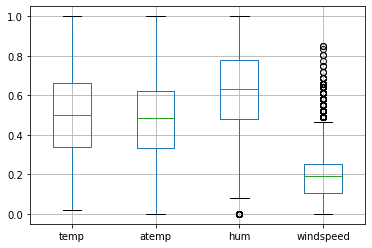

In [16]:
df_hours.boxplot(['temp','atemp','hum','windspeed'])

From the boxplot, it is clear that the data variables 'hum' and 'windspeed' contains outliers. To avoid the effect of extreme weather, we will delete the tuple containing outliers.
<span style="color:red">**handle outlier?**</span>

In [17]:
# handle outliers in hum
q75,q25 = np.percentile(df_hours.loc[:,"hum"],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
df_hours.loc[df_hours["hum"] < min, 'hum'] = np.nan
print('min of hum', min)

# handle outliers in windspeed
q75,q25 = np.percentile(df_hours.loc[:,"windspeed"],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
df_hours.loc[df_hours["windspeed"] > max, 'windspeed'] = np.nan
print('max of windspeed', max)

df_hours.isnull ().sum()

min of hum 0.029999999999999916
max of windspeed 0.4775


instant         0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum            22
windspeed     342
casual          0
registered      0
cnt             0
day             0
dtype: int64

In [18]:
df_hours = df_hours.dropna(axis=0)

## 2.Data Exploration
<span style="color:red">**gain a greater understanding of how much demand to expect during peak commuting hours in the evening?**</span>

In [19]:
df_hours.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day'],
      dtype='object')

<AxesSubplot:xlabel='day', ylabel='cnt'>

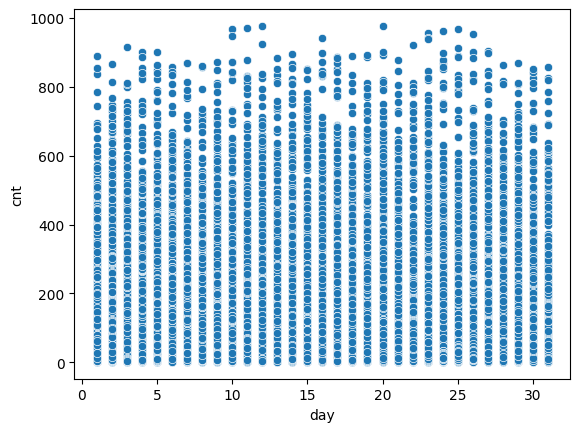

In [20]:
sns.scatterplot(x=df_hours['day'], y=df_hours['cnt'])

<AxesSubplot:xlabel='instant', ylabel='cnt'>

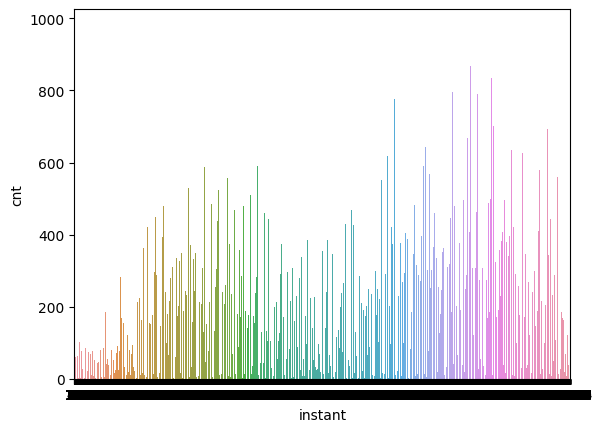

In [21]:
sns.barplot(x=df_hours['instant'], y=df_hours['cnt'])

<AxesSubplot:xlabel='instant', ylabel='cnt'>

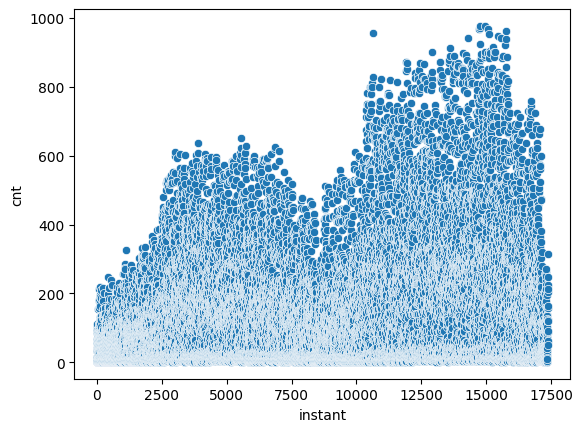

In [22]:
sns.scatterplot(x=df_hours['instant'], y=df_hours['cnt'])

<AxesSubplot:xlabel='season', ylabel='cnt'>

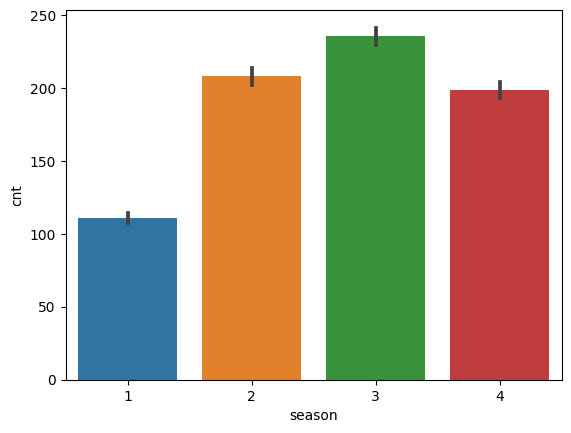

In [23]:
sns.barplot(x=df_hours['season'], y=df_hours['cnt'])

<AxesSubplot:xlabel='yr', ylabel='cnt'>

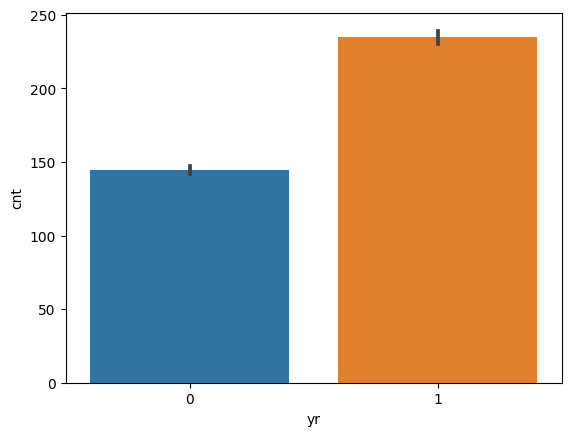

In [24]:
sns.barplot(x=df_hours['yr'], y=df_hours['cnt'])

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

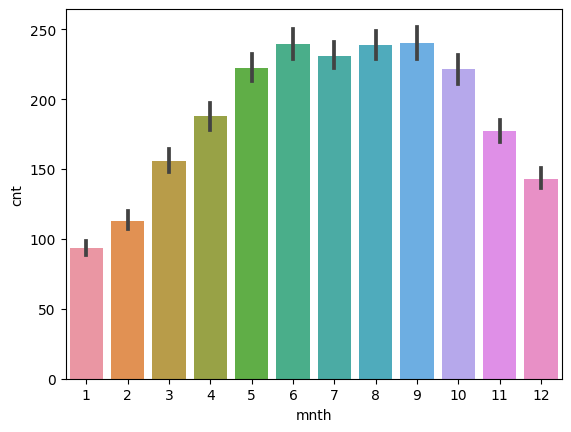

In [25]:
sns.barplot(x=df_hours['mnth'], y=df_hours['cnt'])

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

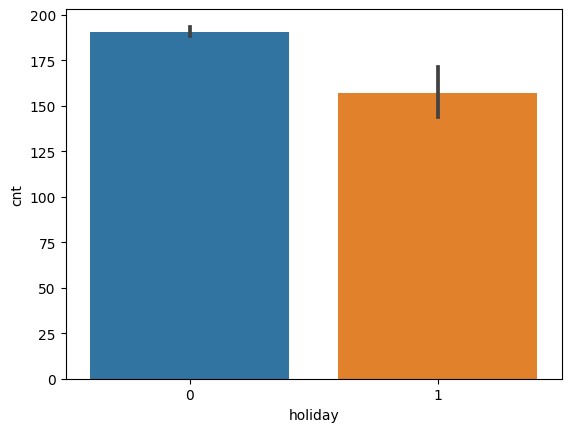

In [26]:
sns.barplot(x=df_hours['holiday'], y=df_hours['cnt'])

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

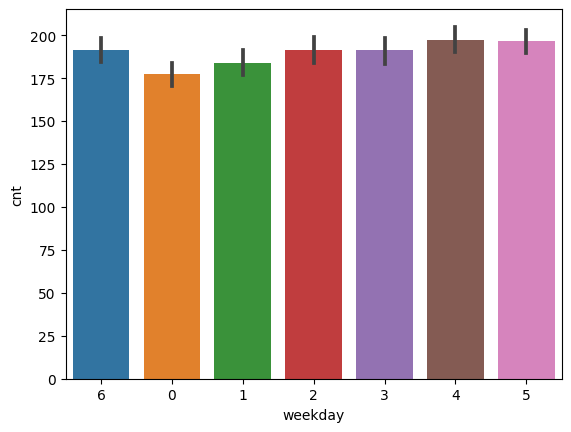

In [27]:
sns.barplot(x=df_hours['weekday'], y=df_hours['cnt'])

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

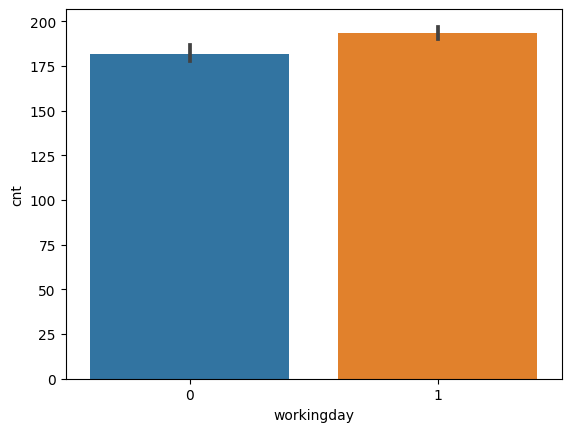

In [28]:
sns.barplot(x=df_hours['workingday'], y=df_hours['cnt'])

<AxesSubplot:xlabel='hr', ylabel='cnt'>

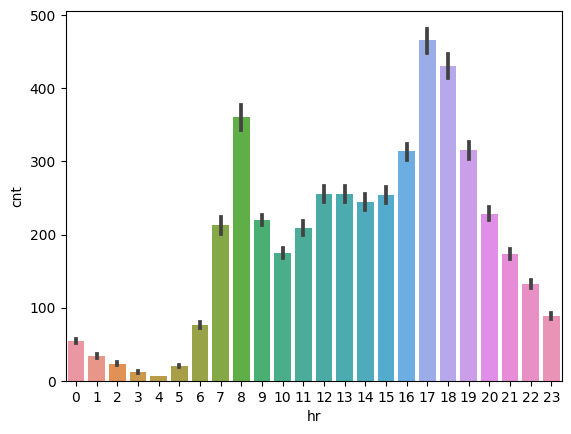

In [29]:
sns.barplot(x=df_hours['hr'], y=df_hours['cnt'])

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

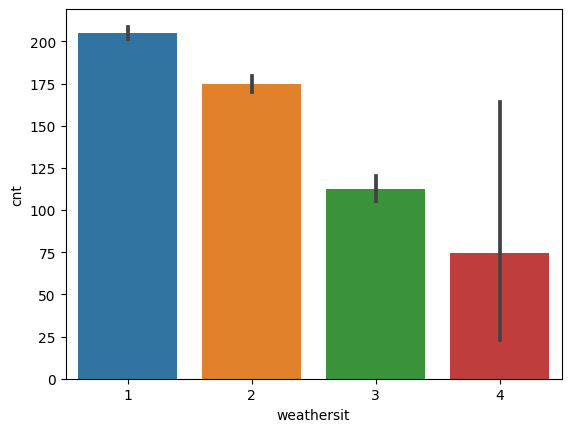

In [30]:
sns.barplot(x=df_hours['weathersit'], y=df_hours['cnt'])

<AxesSubplot:xlabel='temp', ylabel='cnt'>

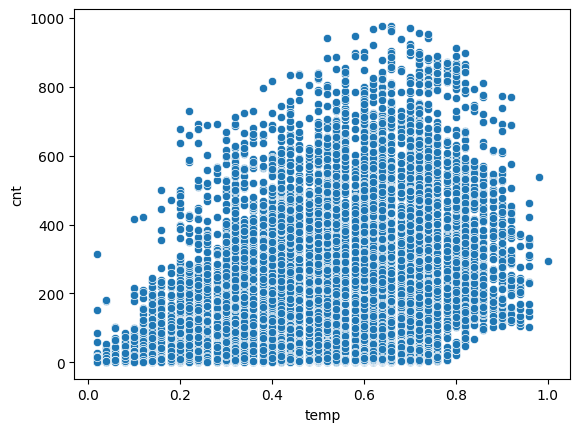

In [31]:
sns.scatterplot(x=df_hours['temp'], y=df_hours['cnt'])

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

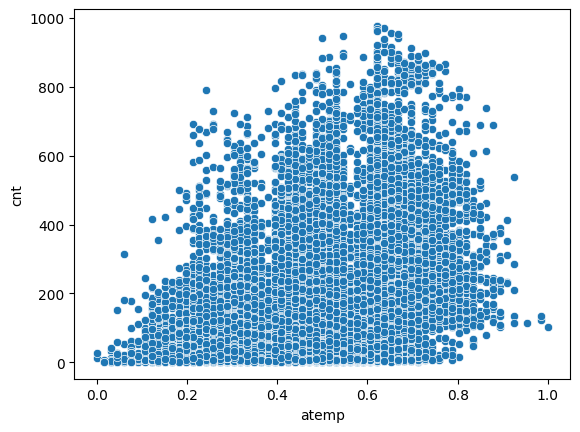

In [32]:
sns.scatterplot(x=df_hours['atemp'], y=df_hours['cnt'])

<AxesSubplot:xlabel='hum', ylabel='cnt'>

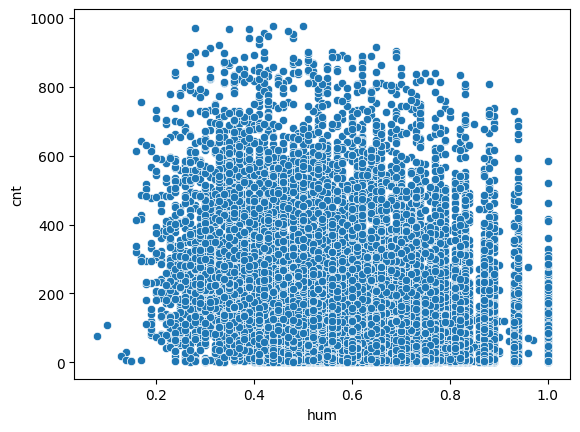

In [33]:
sns.scatterplot(x=df_hours['hum'], y=df_hours['cnt'])

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

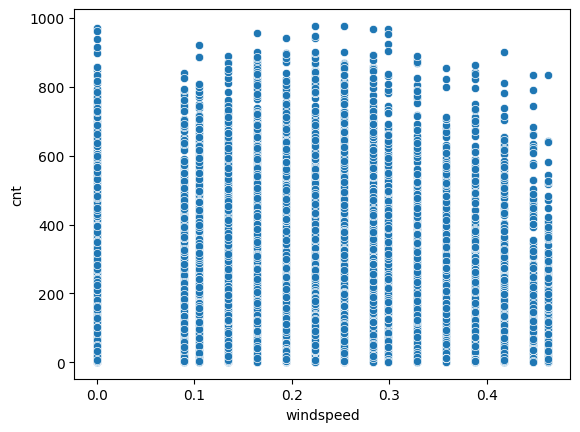

In [34]:
sns.scatterplot(x=df_hours['windspeed'], y=df_hours['cnt'])

## 3. Test of normality using Q-Q plot

In [35]:
df_spring_eveningPeak = df_hours[(df_hours['hr'] >= 16 ) & (df_hours['hr'] <= 19) & (df_hours['season'] == 1)] 
df_summer_eveningPeak = df_hours[(df_hours['hr'] >= 16 ) & (df_hours['hr'] <= 19) & (df_hours['season'] == 2)] 

<function matplotlib.pyplot.show(close=None, block=None)>

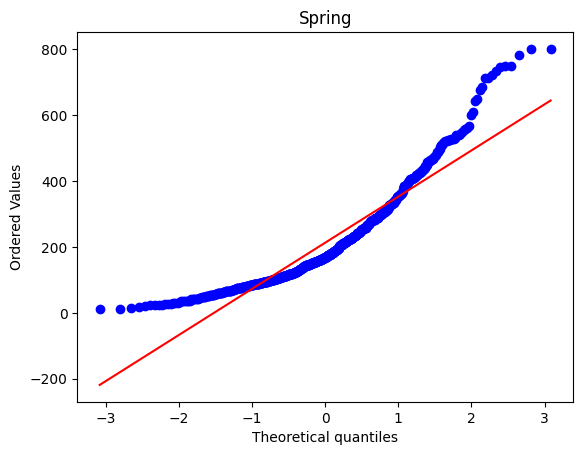

In [36]:
probplot(df_spring_eveningPeak['cnt'], dist="norm", plot=pylab)
pylab.title("Spring")
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

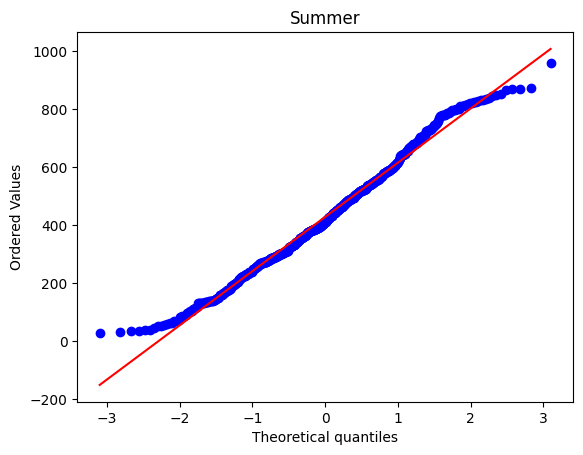

In [37]:
probplot(df_summer_eveningPeak['cnt'], dist="norm", plot=pylab)
pylab.title("Summer")
pylab.show

<span style="color:red">**how many test we need to use for one kind of data? compare the underlying assumptions of test?**</span>
## 4. Chi-square Goodness-of-fit Test for Spring

In [38]:
bins = list(range(0,900,50))

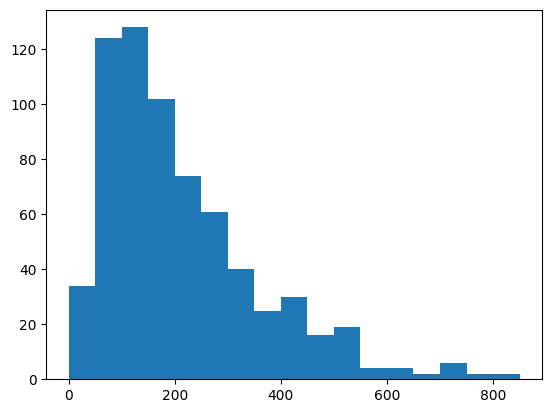

In [39]:
obs,bins,_ = plt.hist(x=df_spring_eveningPeak['cnt'], bins=bins)

In [40]:
obs, bins

(array([ 34., 124., 128., 102.,  74.,  61.,  40.,  25.,  30.,  16.,  19.,
          4.,   4.,   2.,   6.,   2.,   2.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
        650, 700, 750, 800, 850]))

In [41]:
mid = [bins[i]/2 + bins[i-1]/2 for i in range(1,len(bins))]
mid = np.array(mid)
freq_table = pd.DataFrame(np.concatenate([bins[1:,np.newaxis],obs[:,np.newaxis],mid[:,np.newaxis]],1), columns=['up_to','freq','mid'])
freq_table['fx'] = freq_table['mid']*freq_table['freq']
freq_table['fx2'] = freq_table['mid']*freq_table['mid']*freq_table['freq']
freq_table

,up_to,freq,mid,fx,fx2
0,50.0,34.0,25.0,850.0,21250.0
1,100.0,124.0,75.0,9300.0,697500.0
2,150.0,128.0,125.0,16000.0,2000000.0
3,200.0,102.0,175.0,17850.0,3123750.0
4,250.0,74.0,225.0,16650.0,3746250.0
5,300.0,61.0,275.0,16775.0,4613125.0
6,350.0,40.0,325.0,13000.0,4225000.0
7,400.0,25.0,375.0,9375.0,3515625.0
8,450.0,30.0,425.0,12750.0,5418750.0
9,500.0,16.0,475.0,7600.0,3610000.0


In [42]:
n = freq_table['freq'].sum()
mean = freq_table['fx'].sum()/n
var = (freq_table['fx2'].sum()-n*mean*mean)/(n-1)
n, mean, var

(673.0, 213.7072808320951, 22297.879961791547)

The mean and variance of the normal distribution is unknown, then we need to find from the sample data

the mean of sample data is 213.7 and the variance of the sample data is 22185.2

the null hypothesis is that the data is normally distributed using the sample mean and variance as estimates for the population mean and variance

Based on the assumption for the observed data and expected data for each cell should be larger than 5. We need to combine some cells

In [43]:
freq_table = freq_table.iloc[:-6,:2]
freq_table = freq_table.append({'up_to': 650,'freq':8},ignore_index=True)
freq_table = freq_table.append({'up_to':'over 650','freq':12},ignore_index=True)
freq_table

,up_to,freq
0,50.0,34.0
1,100.0,124.0
2,150.0,128.0
3,200.0,102.0
4,250.0,74.0
5,300.0,61.0
6,350.0,40.0
7,400.0,25.0
8,450.0,30.0
9,500.0,16.0


In [44]:
Exp_normal = norm(loc = mean, scale=np.sqrt(var))
freq_table['P(a<x<=b)'] = freq_table['freq']
freq_table.loc[0,'P(a<x<=b)'] = Exp_normal.cdf(50)
n_class = freq_table.shape[0]
for i in range(n_class)[1:-1]:
    freq_table.loc[n_class-i-1,'P(a<x<=b)'] = Exp_normal.cdf(freq_table.loc[n_class-i-1,'up_to'])-Exp_normal.cdf(freq_table.loc[n_class-i-2,'up_to'])
freq_table.loc[freq_table.shape[0]-1,'P(a<x<=b)'] = 1-Exp_normal.cdf(650)
freq_table['Exp_Freq'] = freq_table['P(a<x<=b)'] * n 
freq_table['(O-E)^2/E'] = ((freq_table['freq']-freq_table['Exp_Freq'])**2)/freq_table['Exp_Freq']
freq_table

,up_to,freq,P(a<x<=b),Exp_Freq,(O-E)^2/E
0,50.0,34.0,0.136470,91.844312,36.430829
1,100.0,124.0,0.086716,58.360044,73.827975
2,150.0,128.0,0.111636,75.131061,37.203317
3,200.0,102.0,0.128608,86.553253,2.756707
4,250.0,74.0,0.132585,89.229394,2.599305
5,300.0,61.0,0.122315,82.317718,5.520623
6,350.0,40.0,0.100977,67.957771,11.501804
7,400.0,25.0,0.074598,50.204699,12.653733
8,450.0,30.0,0.049317,33.190022,0.306605
9,500.0,16.0,0.029175,19.634803,0.672876


In [45]:
df = n_class-1-2
chi2Test = freq_table['(O-E)^2/E'].sum()
p = chi2.sf(chi2Test,df)
chi2Test, p

(290.862040302844, 1.326032550141129e-56)

In [46]:
# freq_table['Exp_Freq']=freq_table['freq'].astype(int)
chisquare(f_obs=np.array(freq_table['freq']), f_exp=np.array(freq_table['Exp_Freq']),ddof=2)

Power_divergenceResult(statistic=290.862040302844, pvalue=1.326032550141129e-56)

There is a strong evidence that the null hypothesis test is rejected.

## 5. Likelihood-ratio Test for Spring

In [47]:
freq_table['likelihood score'] = freq_table['freq'] * np.log(freq_table['freq']/freq_table['Exp_Freq'])
G2 = freq_table['likelihood score'].sum()*2
p = chi2.sf(G2,df)
G2, p

(215.96454651846386, 7.470141657170863e-41)

## ~~6. Kolmogorov-Smirnov Test for Summer~~
used to decide if a sample comes from a population with a specific distribution.\
Cannot use this test because of the unknown variance and mean of the expected normal distribution. If the parameters of F(x) are determined from the data Xi, the critical values determined in this way are invalid.
The better approach is to 

In [48]:
# ks = kstest(np.array(df_summer_eveningPeak['cnt']), 'norm',args=(df_summer_eveningPeak['cnt'].mean(),df_summer_eveningPeak['cnt'].std()))
# ks

There is a strong evidence that the null hypothesis test is not rejected (p>0.05).

## 6. Lilliefors' test for Summer
use KS statistic but the distribution of the test statistic reflect the effect of parameters estimation.

In [49]:
lilliefors(np.array(df_summer_eveningPeak['cnt']))

(0.04153556850775986, 0.007490561250604516)

## 7. Anderson-Darling Test for Summer
It is a modification of the Kolmogorov-Smirnov (K-S) test and gives more weight to the tails than does the K-S test. <span style="color:red">**estimated parameter?**</span>

In [50]:
anderson(np.array(df_summer_eveningPeak['cnt']))

AndersonResult(statistic=1.6828359883984376, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

statistic > 1.086, there is a strong evidence that the null hypothesis is rejected.

## 8.Shapiro Wilk Test for Summer
the parameters aren't assumed known <span style="color:red">**sample size?**</span>

In [51]:
shapiro(np.array(df_summer_eveningPeak['cnt']))

ShapiroResult(statistic=0.9886163473129272, pvalue=2.364095598750282e-05)